In [1]:
%load_ext autoreload
%autoreload 2

>> #### Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

>> #### Import required modules

In [24]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from plot import Plot

Initialize loaddata, plot class

In [27]:
loader = LoadData()
plot = Plot()

Load datasets from csv files

In [ ]:
# # Get URL from DVC
# path = 'data/AdSmartABdata.csv'
# repo = 'https://github.com/jedisam/abtest-mlops'
# version = '6db449393c9626c4fbca44946dfa103660685a27'

In [9]:
train_df = loader.read_csv('../data/train.csv')
test_df = loader.read_csv('../data/test.csv')
store_df = loader.read_csv('../data/store.csv')
sub_df = loader.read_csv('../data/sample_submission.csv')

/tmp/ipykernel_26045/546756437.py:1: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  train_df = loader.read_csv('../data/train.csv')


In [10]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
train_df.shape

(1017209, 9)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There is no missing data in the training set

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


Some data are missing from the open feature in the test dataset

In [20]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


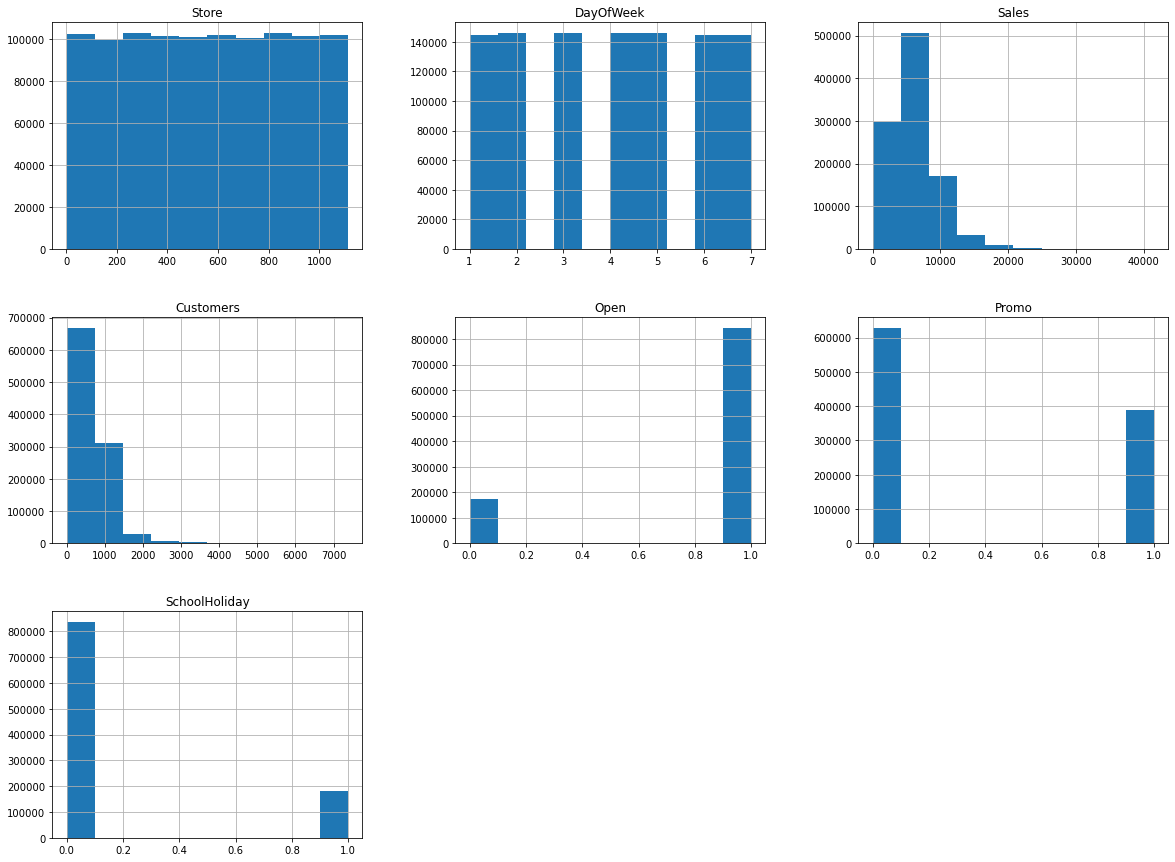

In [21]:
#Numerical Features Histograms (Train)
num_feats = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_df[num_feats].hist(figsize=(20,15));

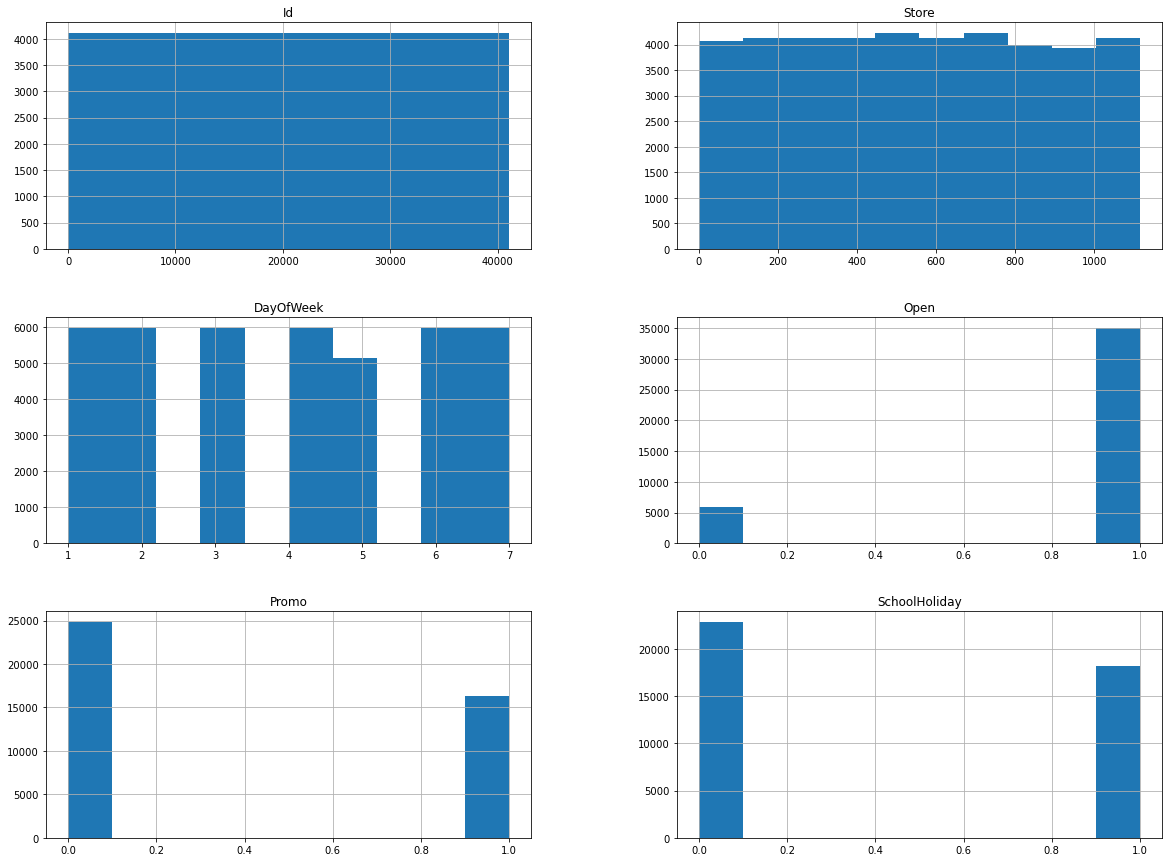

In [22]:
#Numerical Features Histograms (Test)
num_feats = list(test_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_df[num_feats].hist(figsize=(20,15));

It can be seen that some of the features that are in the train does not exist in the test set

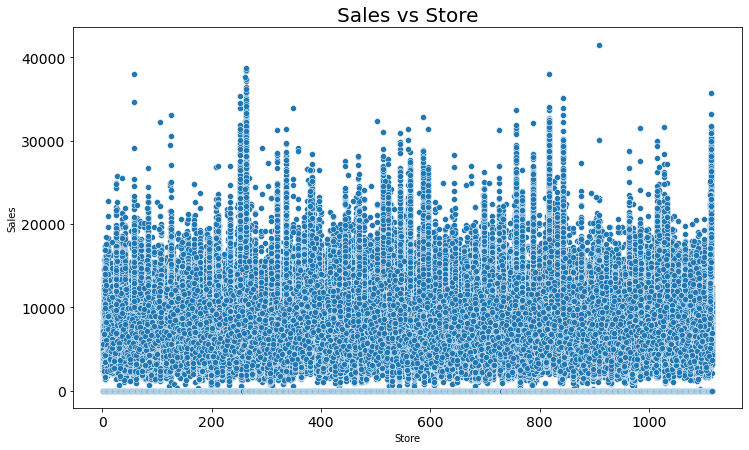

In [32]:
#Sales_Stores
# plt.figure(figsize=(12, 8))
# plt.scatter(train_df['Store'],train_df['Sales'], alpha=0.1);
# plt.plot()

plot.plot_scatter(train_df, train_df['Store'], train_df['Sales'], 'Sales vs Store', None, None)

It can be seen that there are some outliers in the training set and they are above from 2000

<Figure size 864x504 with 0 Axes>

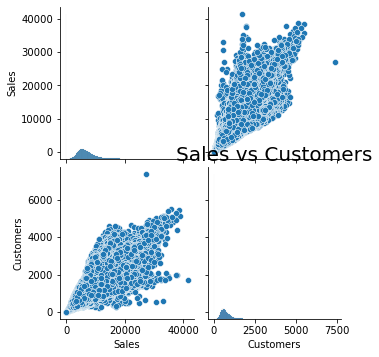

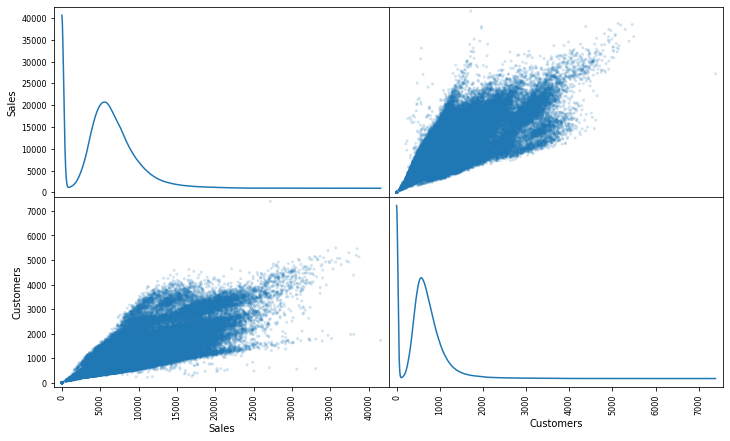

In [39]:
#Sales_Customers
attributes = ["Sales", "Customers"]
plot.sc_matrix(train_df[attributes], "Sales vs Customers")

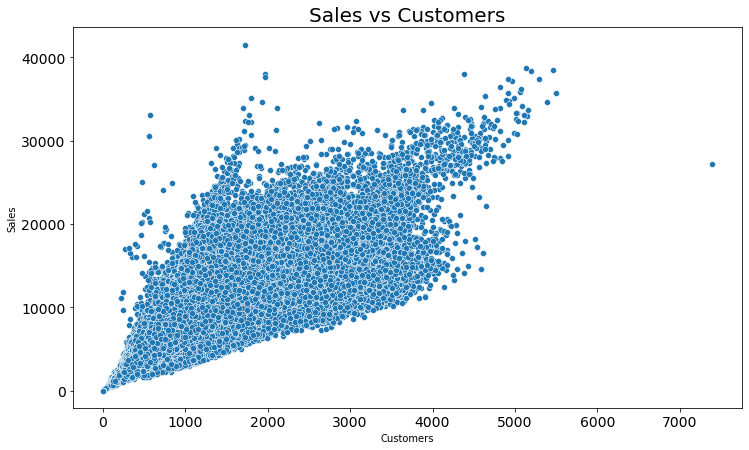

In [44]:
plot.plot_scatter(train_df[attributes], train_df['Customers'], train_df['Sales'], 'Sales vs Customers', None, None)

It can be clearly seen that there is a positive correlation between the number of sales and the number of customers

In [49]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# #Sales_CompetitionDistance
# attributes = ["Sales", "CompetitionDistance"]
# scatter_matrix(train_df[attributes], alpha=0.1);

[]

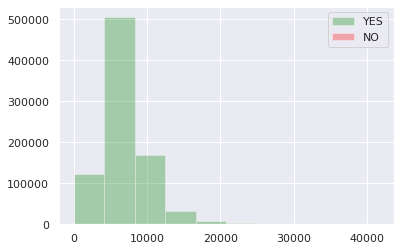

In [55]:
#Sales_Open
sns.set()
plt.hist(train_df[train_df['Open'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
plt.hist(train_df[train_df['Open'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
plt.legend()
plt.plot()

[]

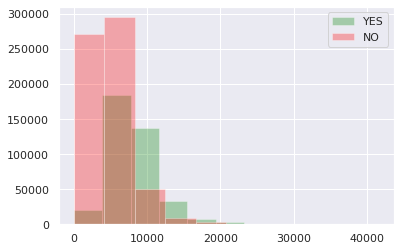

In [56]:
#Sales_Promo
sns.set()
plt.hist(train_df[train_df['Promo'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
plt.hist(train_df[train_df['Promo'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
plt.legend()
plt.plot()

In [59]:
# #Sales_Promo2
# sns.set()
# plt.hist(train_df[train_df['Promo2'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
# plt.hist(train_df[train_df['Promo2'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
# plt.legend()
# plt.plot()

In [58]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')